<a href="https://colab.research.google.com/github/andreas31603/MechaineLearningTasks/blob/main/Task9/Regression_Model_SVM_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Untuk mengabilkan dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Membaca file dataset
file_path = '/content/drive/MyDrive/Dataset/CreditDataset.csv'
data = pd.read_csv(file_path)


In [4]:
# Menghapus kolom target untuk analisis (kolom 'Class' adalah target)
X = data.drop(columns=['Class'])

In [5]:
# Mengubah target menjadi numerik menggunakan LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Class'])

In [6]:
# Mengonversi variabel kategorikal menjadi numerik dengan LabelEncoder untuk setiap kolom
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

In [7]:
# Melakukan standarisasi fitur agar semua fitur berada dalam skala yang sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [8]:
# Membagi data menjadi set latih dan set uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Membuat model Support Vector Regression (SVM Regression)
svm_regressor = SVR(kernel='rbf')  # Kernel RBF sering digunakan untuk data non-linear

In [10]:
# Melatih model pada data latih
svm_regressor.fit(X_train, y_train)

SVR()

In [11]:
# Melakukan prediksi pada data uji
y_pred = svm_regressor.predict(X_test)

In [13]:
# Evaluasi model regresi
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)            # R-squared

In [14]:
# Menampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.15437820375875233
R-squared (R²): 0.25770787951074736


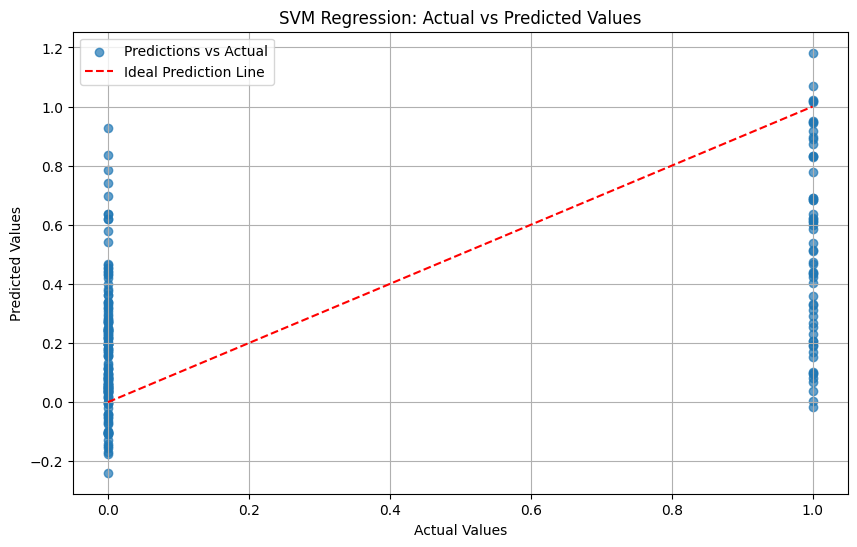

In [15]:
# Visualisasi hasil prediksi vs nilai sebenarnya
plt.figure(figsize=(10, 6))

# Scatter plot untuk membandingkan prediksi dan nilai sebenarnya
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions vs Actual')

# Tambahkan garis referensi (y = x) untuk menunjukkan kesempurnaan prediksi
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Prediction Line')

# Label pada grafik
plt.title('SVM Regression: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

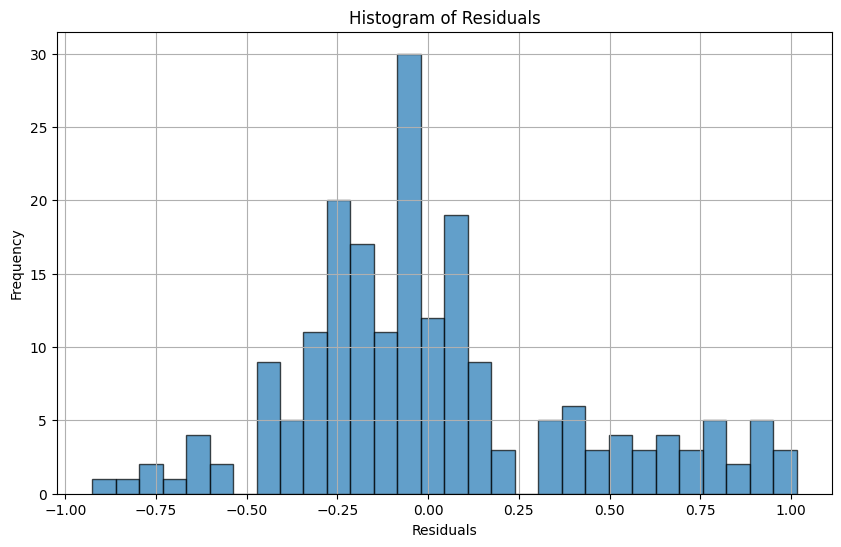

In [16]:
# Visualisasi residuals (kesalahan prediksi)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()